In [4]:
%load_ext watermark
%watermark -p scikit-learn,mlxtend,xgboost
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV



The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
scikit-learn: 0.0
mlxtend     : 0.19.0
xgboost     : not installed



In [4]:

data=pd.read_csv("Bank_Loan_Modeling_Data.csv")

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [6]:

for i in data.columns:
    print(i,data[i].nunique(),len(data) ) 
    #can remove ID (high variability), can remove zip code(wont generalize),can remove personal loan(low vairabilty) 
   

ID 480 480
Age 40 480
Experience 42 480
Income 102 480
ZIP Code 238 480
Family 4 480
CCAvg 95 480
Education 3 480
Mortgage 141 480
Personal Loan 1 480
Securities Account 2 480
CD Account 2 480
Online 2 480
CreditCard 2 480


In [7]:

#removed these
data.drop(["ID"], axis =1, inplace = True)
data.drop(["ZIP Code"], axis=1, inplace=True)
data.drop(["Personal Loan"], axis =1, inplace =True)

In [8]:

data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,9,180,1,8.9,3,0,0,0,0,0
1,38,14,130,4,4.7,3,134,0,0,0,0
2,46,21,193,2,8.1,3,0,0,0,0,0
3,38,13,119,1,3.3,2,0,0,1,1,1
4,42,18,141,3,5.0,3,0,1,1,1,0


In [9]:

#train test split
X = data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'CreditCard']]
y = data[['Online']]


X_temp, X_test, y_temp, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = \
    train_test_split(X_temp, y_temp, test_size=0.2, random_state=123, stratify=y_temp)
y_train=np.array(y_train)

print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])



Train/Valid/Test sizes: 268 68 144


In [10]:

#feature scaling 
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_valid = st_x.transform(X_valid)
X_test = st_x.transform(X_test)

In [15]:

#gridsearch CV on tree
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


tree = DecisionTreeClassifier(random_state=123)

param_grid = [{"max_depth": [1,2,3,4,5,10,15,20,30,40,50,None],
               "criterion": ["gini", "entropy"]
               
               
}]

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best DT Training Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best DT Validation Accuracy: %.2f%%' % (gs.best_estimator_.score(X_valid,y_valid)*100))
print('Best DT Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100))
print("Best DT Params:{}".format(gs.best_params_) )

Best DT Training Accuracy: 71.60%
Best DT Validation Accuracy: 63.24%
Best DT Test Accuracy: 73.61%
Best DT Params:{'criterion': 'gini', 'max_depth': 2}


[Text(167.4, 181.2, 'X[8] <= 0.48\ngini = 0.477\nsamples = 268\nvalue = [105, 163]'),
 Text(83.7, 108.72, 'X[9] <= 0.44\ngini = 0.5\nsamples = 192\nvalue = [99, 93]'),
 Text(41.85, 36.23999999999998, 'gini = 0.49\nsamples = 163\nvalue = [70, 93]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(251.10000000000002, 108.72, 'X[2] <= -0.554\ngini = 0.145\nsamples = 76\nvalue = [6, 70]'),
 Text(209.25, 36.23999999999998, 'gini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(292.95, 36.23999999999998, 'gini = 0.036\nsamples = 54\nvalue = [1, 53]')]

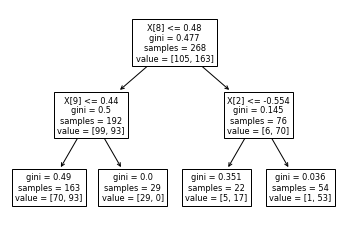

In [37]:

tree.plot_tree(gs.best_estimator_)

In [48]:
#manav
#KNN
knn = KNeighborsClassifier()
param_grid = [{"n_neighbors": [1,5,6,10,15,16,17,18,19,20,21,22,23,24,25], #focused around square root of n
               "weights": ["uniform", "distance"],
               "algorithm": ["ball_tree", "kd_tree", "brute"],
               "p":[1,2] #1 is manhattan and 2 is euclidean with default "metric" param
              }]
gs_knn = GridSearchCV(estimator = knn,
                     param_grid=param_grid,
                     scoring="accuracy",
                     cv=10)
gs_knn.fit(X_train, y_train.ravel())

print('Best KNN Training Accuracy: %.2f%%' % (gs_knn.best_score_*100))
print('Best KNN Validation Accuracy: %.2f%%' % (gs_knn.best_estimator_.score(X_valid,y_valid)*100))
print('Best KNN Test Accuracy: %.2f%%' % (gs_knn.best_estimator_.score(X_test,y_test)*100))
print("Best KNN Params:{}".format(gs_knn.best_params_) )

Best KNN Training Accuracy: 70.87%
Best DT Validation Accuracy: 66.18%
Best DT Test Accuracy: 68.75%
Best KNN Params:{'algorithm': 'ball_tree', 'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}


In [17]:

#model: Bagged DT use grid searched model so place this block after gridsearch cv
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier


\

bag = BaggingClassifier(base_estimator=gs.best_estimator_,
                        n_estimators=500,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

bag.fit(X_train, y_train.ravel())
    

print("OOB Accuracy: %.2f%%" % ((bag.oob_score_*100)))
print("Validation Accuracy: %.2f%%" % (bag.score(X_valid, y_valid)*100))
print("Test Accuracy: %.2f%%" % (bag.score(X_test, y_test)*100))


OOB Accuracy: 71.64%
Validation Accuracy: 63.24%
Test Accuracy: 73.61%


In [18]:

#bagged knn
bag_knn = BaggingClassifier(base_estimator=gs_knn.best_estimator_,
                        n_estimators=500,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)
bag_knn.fit(X_train, y_train.ravel())
print("OOB Accuracy: %0.2f%%" % (bag_knn.oob_score_*100))
print("Validation Accuracy: %0.2f%%" % (bag_knn.score(X_valid, y_valid)*100))
print("Test Accuracy: %0.2f%%" % (bag_knn.score(X_test, y_test)*100))

OOB Accuracy: 68.28%
Validation Accuracy: 63.24%
Test Accuracy: 67.36%


In [19]:

#using random search cv to test a wider array of hyperparameters, using random search for computational efficiency 
param_grid = [{"max_depth": scipy.stats.randint(1,100),
               "criterion": ["gini", "entropy"],
               "splitter": ["best", "random"],
               "min_samples_split":scipy.stats.randint(1,40),
               "min_samples_leaf":scipy.stats.randint(1,20)
               
               
}]

search = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_grid,
    n_iter=100,
    cv=10,
    verbose=2,
    n_jobs=1)


search.fit(X_train, y_train)
print("Random Search Training Accuracy: %0.2f%%" % (search.best_score_*100))
print("Random Search Validation Accuracy: %0.2f%%" % (search.best_estimator_.score(X_valid, y_valid)*100))
print("Random Search Test Accuracy: %0.2f%%" % (search.best_estimator_.score(X_test, y_test)*100))
print(search.best_params_)#best params

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18, min_samples_split=1, splitter=best; total time

[CV] END criterion=gini, max_depth=69, min_samples_leaf=15, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=69, min_samples_leaf=15, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=69, min_samples_leaf=15, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=69, min_samples_leaf=15, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=69, min_samples_leaf=15, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=69, min_samples_leaf=15, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=69, min_samples_leaf=15, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=69, min_samples_leaf=15, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=7, min_samples_s

[CV] END criterion=entropy, max_depth=56, min_samples_leaf=7, min_samples_split=34, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=56, min_samples_leaf=7, min_samples_split=34, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=56, min_samples_leaf=7, min_samples_split=34, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=56, min_samples_leaf=7, min_samples_split=34, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=56, min_samples_leaf=7, min_samples_split=34, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=56, min_samples_leaf=7, min_samples_split=34, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=56, min_samples_leaf=7, min_samples_split=34, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=56, min_samples_leaf=7, min_samples_split=34, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=56

[CV] END criterion=gini, max_depth=83, min_samples_leaf=10, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=83, min_samples_leaf=10, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=83, min_samples_leaf=10, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=83, min_samples_leaf=10, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=83, min_samples_leaf=10, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=83, min_samples_leaf=10, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=83, min_samples_leaf=10, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=83, min_samples_leaf=10, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=75, min_samples_le

[CV] END criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=32, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=13

[CV] END criterion=gini, max_depth=74, min_samples_leaf=6, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=74, min_samples_leaf=6, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=74, min_samples_leaf=6, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=74, min_samples_leaf=6, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=74, min_samples_leaf=6, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=74, min_samples_leaf=6, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=74, min_samples_leaf=6, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=79, min_samples_leaf=9, min_samples_split=19, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=79, min_samples_leaf=9,

[CV] END criterion=entropy, max_depth=35, min_samples_leaf=11, min_samples_split=18, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=35, min_samples_leaf=11, min_samples_split=18, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=35, min_samples_leaf=11, min_samples_split=18, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=35, min_samples_leaf=11, min_samples_split=18, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=88, min_samples_leaf=1, min_samples_split=38, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=88, min_samples_leaf=1, min_samples_split=38, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=88, min_samples_leaf=1, min_samples_split=38, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=88, min_samples_leaf=1, min_samples_split=38, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=88, min_sample

[CV] END criterion=gini, max_depth=14, min_samples_leaf=16, min_samples_split=21, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=14, min_samples_leaf=16, min_samples_split=21, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=14, min_samples_leaf=16, min_samples_split=21, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=14, min_samples_leaf=16, min_samples_split=21, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=33, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=33, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=33, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=33, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=38, min_samples_leaf=4, mi

[CV] END criterion=gini, max_depth=48, min_samples_leaf=16, min_samples_split=36, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=48, min_samples_leaf=16, min_samples_split=36, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=48, min_samples_leaf=16, min_samples_split=36, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=48, min_samples_leaf=16, min_samples_split=36, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=48, min_samples_leaf=16, min_samples_split=36, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=48, min_samples_leaf=16, min_samples_split=36, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=48, min_samples_leaf=16, min_samples_split=36, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=54, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=54, min_samples_l

[CV] END criterion=gini, max_depth=18, min_samples_leaf=10, min_samples_split=24, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=10, min_samples_split=24, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=10, min_samples_split=24, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=10, min_samples_split=24, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=10, min_samples_split=24, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=10, min_samples_split=24, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=10, min_samples_split=24, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=10, min_samples_split=24, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklea

[Text(181.95652173913044, 208.38, 'X[8] <= -0.138\ngini = 0.477\nsamples = 268\nvalue = [105, 163]'),
 Text(101.89565217391305, 190.26, 'X[9] <= 0.997\ngini = 0.5\nsamples = 192\nvalue = [99, 93]'),
 Text(87.33913043478262, 172.14, 'X[3] <= -0.709\ngini = 0.49\nsamples = 163\nvalue = [70, 93]'),
 Text(29.11304347826087, 154.01999999999998, 'X[5] <= 0.767\ngini = 0.499\nsamples = 31\nvalue = [16, 15]'),
 Text(14.556521739130435, 135.89999999999998, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(43.66956521739131, 135.89999999999998, 'X[4] <= 0.013\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(29.11304347826087, 117.77999999999999, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(58.22608695652174, 117.77999999999999, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(145.56521739130434, 154.01999999999998, 'X[5] <= -1.087\ngini = 0.483\nsamples = 132\nvalue = [54, 78]'),
 Text(101.89565217391305, 135.89999999999998, 'X[3] <= 1.059\ngini = 0.499\nsamples = 23\nvalue = [

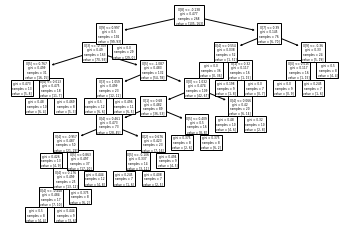

In [40]:

tree.plot_tree(search.best_estimator_)

In [3]:

#create dt classifer obj
clf = DecisionTreeClassifier(criterion = "entropy", max_depth =3)

#train clf
clf=clf.fit(X_train,y_train)

#predict the response for test dataset
y_pred = clf.predict(X_test)

NameError: name 'DecisionTreeClassifier' is not defined

In [1]:
tree.plot_tree(clf)

NameError: name 'tree' is not defined

In [47]:

#model accurary: how often classifier is correct
from sklearn import metrics
print("Accuracy: ", (metrics.accuracy_score(y_test,y_pred)*100))#test
print(clf.score(X_train, y_train)*100)#train

Accuracy:  72.22222222222221
73.88059701492537


In [22]:

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [64]:
#, not using min max scaling
#probs should move this up
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

#x_train_scaled = scaler.fit_transform(X_train)
#x_train = pd.DataFrame(x_train_scaled)

#x_test_scaled = scaler.fit_transform(X_test)
#x_test = pd.DataFrame(x_test_scaled)

In [25]:

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)#k=6 is best


RMSE value for k=  1 is: 0.5270462766947299
RMSE value for k=  2 is: 0.4732423621500228
RMSE value for k=  3 is: 0.44270492918081183
RMSE value for k=  4 is: 0.43799575086726333
RMSE value for k=  5 is: 0.43588989435406744
RMSE value for k=  6 is: 0.4208127057650866
RMSE value for k=  7 is: 0.42274478344201677
RMSE value for k=  8 is: 0.4253011596373667
RMSE value for k=  9 is: 0.42592592592592593
RMSE value for k=  10 is: 0.42736271349860283
RMSE value for k=  11 is: 0.42261592972670764
RMSE value for k=  12 is: 0.4307235335405752
RMSE value for k=  13 is: 0.43282286729217423
RMSE value for k=  14 is: 0.43753036823659647
RMSE value for k=  15 is: 0.44385377416386373
RMSE value for k=  16 is: 0.44478678763912644
RMSE value for k=  17 is: 0.44594374178604546
RMSE value for k=  18 is: 0.44405847438080737
RMSE value for k=  19 is: 0.4418519533295361
RMSE value for k=  20 is: 0.4417452760232857


<AxesSubplot:>

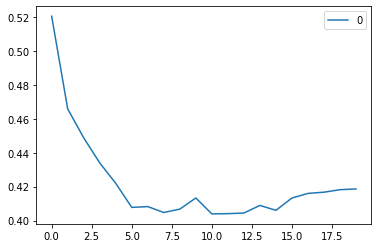

In [66]:

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [27]:

#accuracy 
knn = neighbors.KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train.ravel())
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)#accuracy on test

72.22222222222221


In [29]:

#Fitting Random Forest classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 2, criterion="entropy")  
classifier.fit(X_train, y_train.ravel())  

RandomForestClassifier(criterion='entropy', n_estimators=2)

In [30]:

#random forest needs to be cross validated- very over fit, by increasing the n_estimators overfitting seems to increase
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
forest = RandomForestClassifier(n_estimators = 50, random_state = 1)
forest.fit(X_train, y_train.ravel())


print('Training Accuracy: %0.2f%%' % (forest.score (X_train, y_train)*100))
print("Validation Accuracy: %0.2f%%" % (forest.score(X_valid, y_valid)*100))
print("Test Accuracy: %0.2f%%" % (forest.score(X_test, y_test)*100))

Training Accuracy: 100.00%
Validation Accuracy: 55.88%
Test Accuracy: 72.22%


In [31]:

#random forest feature importance, this will hvae to be vhnaged after cross validation
forest.fit(X_train, y_train.ravel())
importance_vals = forest.feature_importances_
print(importance_vals)
#income or cc avg 

[0.12601052 0.12484807 0.16285411 0.05368983 0.16085205 0.04890044
 0.07230631 0.01382511 0.1411538  0.09555976]


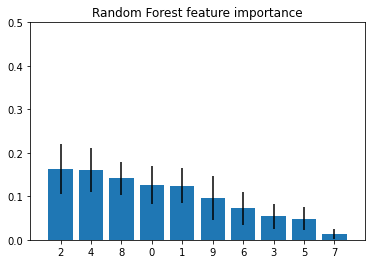

In [32]:

#plot feature importance 
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importance_vals)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Random Forest feature importance")
plt.bar(range(X.shape[1]), importance_vals[indices],
        yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.5])
plt.show()

In [34]:

#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
forest = RandomForestClassifier(n_estimators = 100, random_state = 1)
forest.fit(X_train, y_train.ravel())

param_grid = [{"criterion": ["gini"],
               "class_weight":["balanced"],
               "max_features":["auto"]
              }]
gs_forest = GridSearchCV(estimator = forest,
                         param_grid=param_grid,
                         scoring="accuracy",
                         cv=10)
gs_forest.fit(X_train, y_train.ravel())

print('Best Training Accuracy: %.2f%%' % (gs_forest.best_score_*100))
print('Best Validation Accuracy: %.2f%%' % (gs_forest.best_estimator_.score(X_valid,y_valid)*100))
print('Best Test Accuracy: %.2f%%' % (gs_forest.best_estimator_.score(X_test, y_test)*100))
print("Best Params:{}".format(gs_forest.best_params_) )



Best Training Accuracy: 69.05%
Best Validation Accuracy: 58.82%
Best Test Accuracy: 72.92%
Best Params:{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto'}


In [45]:

#gridsearched random forest's feature importance
gs_forest.best_estimator_.fit(X_train, y_train.ravel())
importance_vals = gs_forest.best_estimator_.feature_importances_
print(importance_vals)
#income or cc avg 

[0.13631667 0.12472753 0.14450753 0.05363885 0.16739668 0.04761893
 0.06863867 0.01765051 0.16754136 0.07196326]


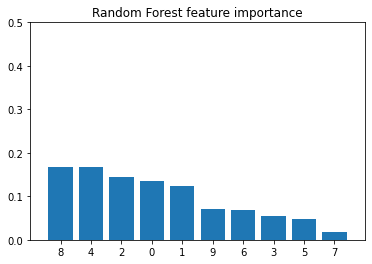

In [46]:

#plot feature importance 
std = np.std([gs_forest.best_estimator_.feature_importances_ for tree in gs_forest.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importance_vals)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Random Forest feature importance")
plt.bar(range(X.shape[1]), importance_vals[indices],
        yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.5])
plt.show()